In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [255]:
#DATA COLLECTION AND ANALYSIS

In [257]:
#loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [259]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [261]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [263]:
#getting some information  about the dataset
insurance_dataset.info()

#we can see that no values are missing
#we can three categorical features in this dataset - sex, smoker, region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [265]:
#check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [267]:
#Data Analysi

In [269]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


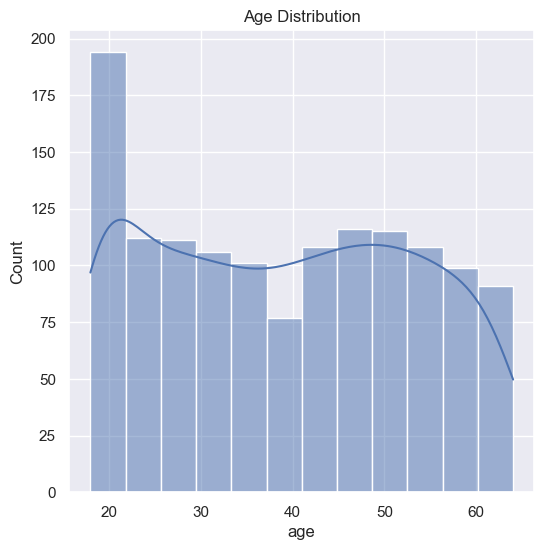

In [271]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'],kde=True)
plt.title('Age Distribution')
plt.show()


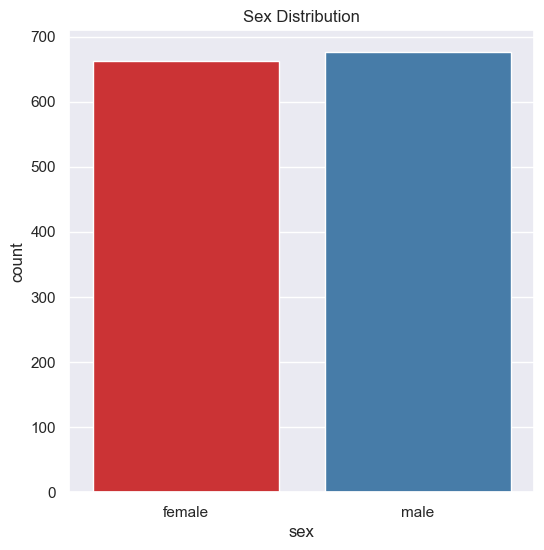

In [272]:
#gener column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, hue='sex', palette='Set1', legend=False)
plt.title('Sex Distribution')
plt.show()

#distribution almost same for both male and female

In [274]:
#check how many male and females
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

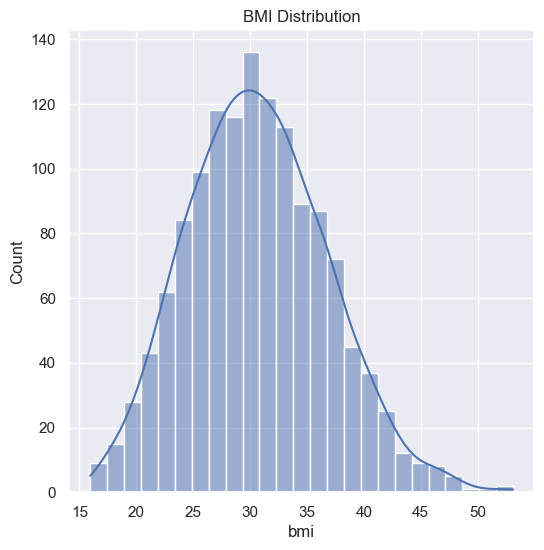

In [277]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True) 
plt.title('BMI Distribution')
plt.show()

#we can see its a normal distribution

In [279]:
#Normal BMI Range -> 18.5 to 24.9
#Therefore we can see from the plot that a lot of people are over 
# this range/overweight

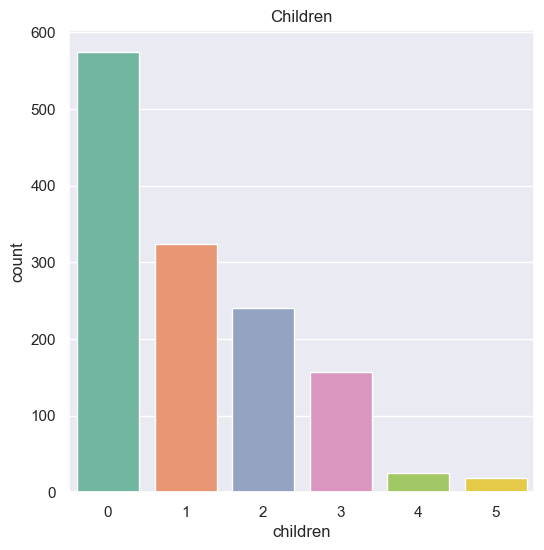

In [281]:
#Children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_dataset, hue='children', palette='Set2', legend=False)
plt.title('Children')
plt.show()

In [283]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

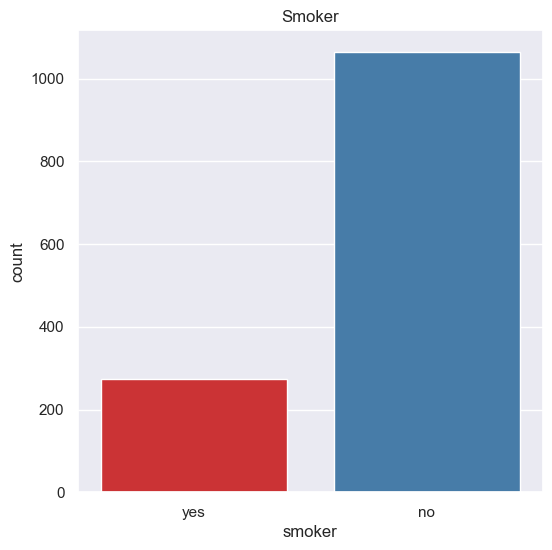

In [285]:
#Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset, hue='smoker', palette='Set1', legend=False)
plt.title('Smoker')
plt.show()

In [287]:
#we can see we have more non-smokers.
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

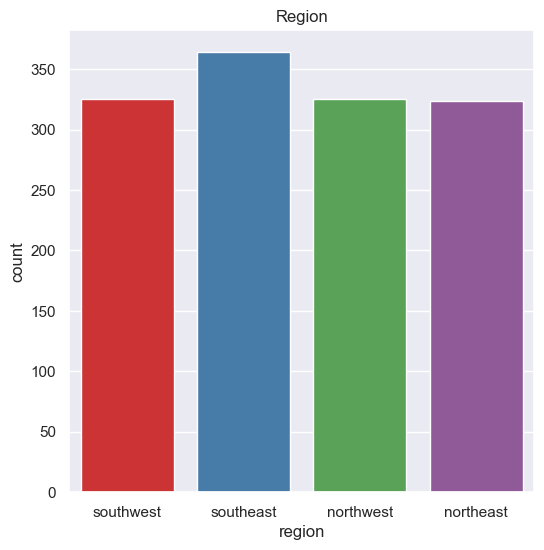

In [289]:
#Region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset, hue='region', palette='Set1', legend=False)
plt.title('Region')
plt.show()

In [291]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

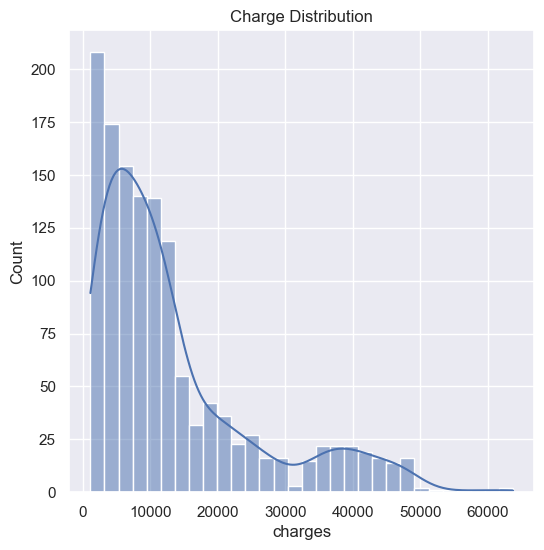

In [293]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'],kde=True)
plt.title('Charge Distribution')
plt.show()

In [295]:
#DATA PRE_PROCESSING AND FURTHER EDA

In [297]:
#Encoding categorical features

In [359]:
#encoding sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

#encodin smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

#encoding region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


# Retain the old behavior by using infer_objects
insurance_dataset = insurance_dataset.infer_objects(copy=False)


In [361]:
#check that the catgeorical features have been encoded
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


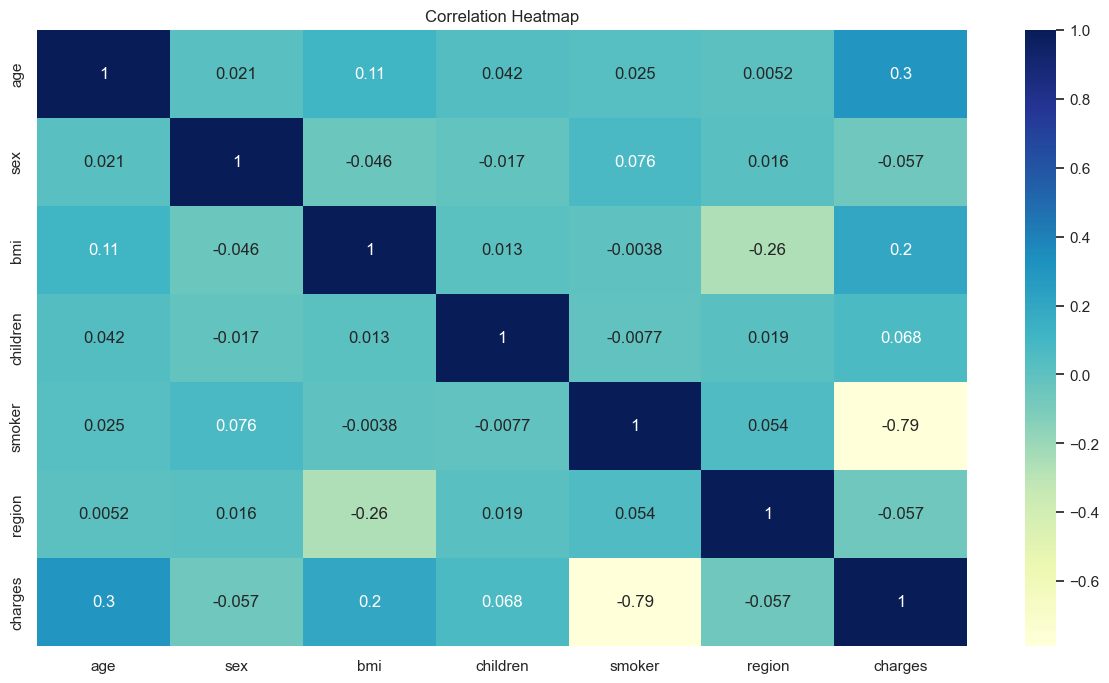

In [363]:
#Generate a correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(insurance_dataset.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

It is established from this correlation heatmap that sex, children, and region do NOT have strong correlation w charges

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

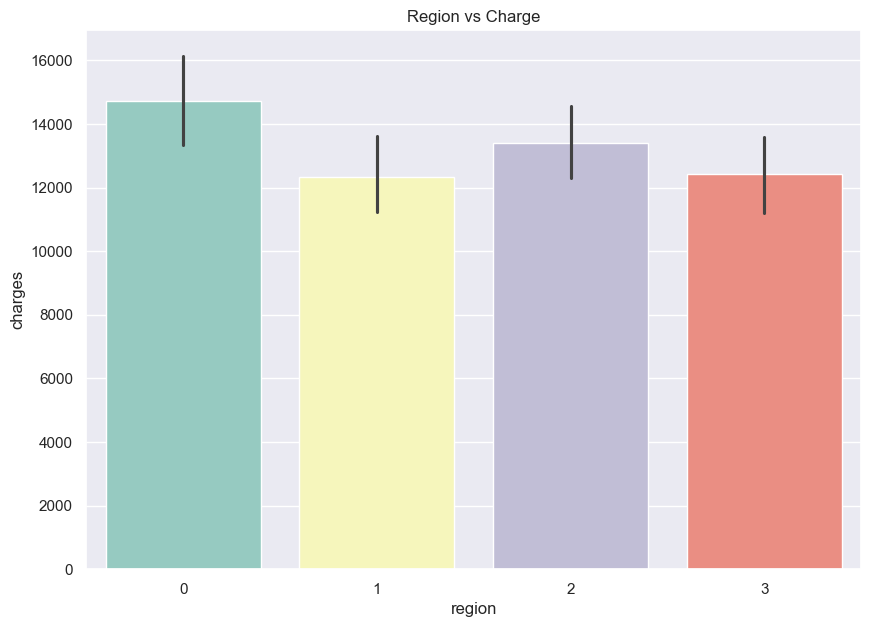

In [366]:
#Plotting a region vs charge barplot

plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region', y='charges', data=insurance_dataset, palette='Set3', hue='region', legend=False)

Barplot shows that the 'SouthEast' region has a higher 'Charge', followed by 'NorthEast'. Rest are almost same..

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

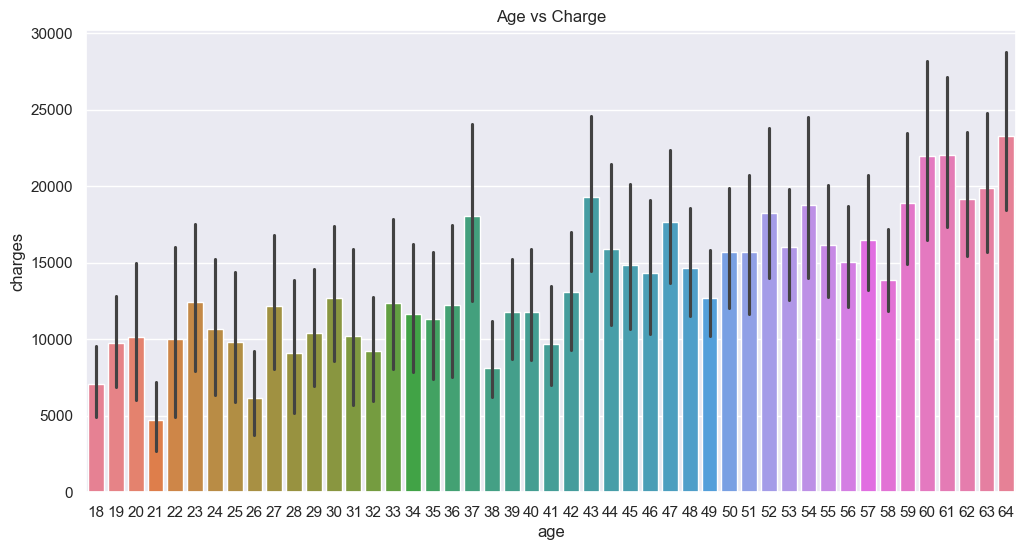

In [369]:
#Plotting a barplot for age vs charge

plt.figure(figsize=(12,6))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=insurance_dataset, palette='husl', hue='age', legend=False)

Barplot shows that charge increases as age of individual increases

Text(0.5, 1.0, 'BMI VS Charge')

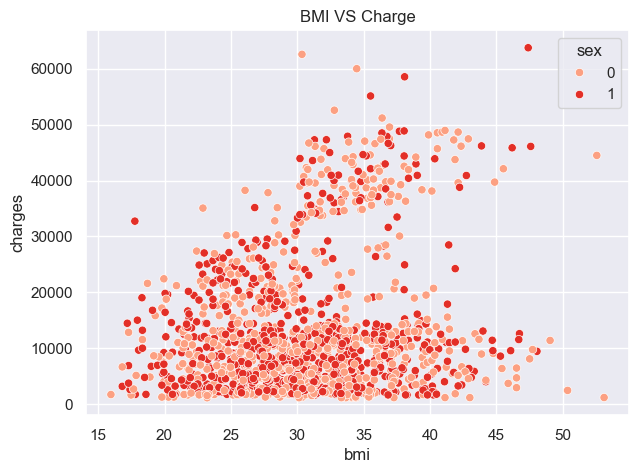

In [371]:
#Plotting BMI vs Charge graph
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=insurance_dataset,palette='Reds')
plt.title('BMI VS Charge')

Higher BMI seems to correlate to higher charges per individual. Majorly after 25 BMI point

Also, we can establish that sex does not seem to make any statistical difference in charges

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

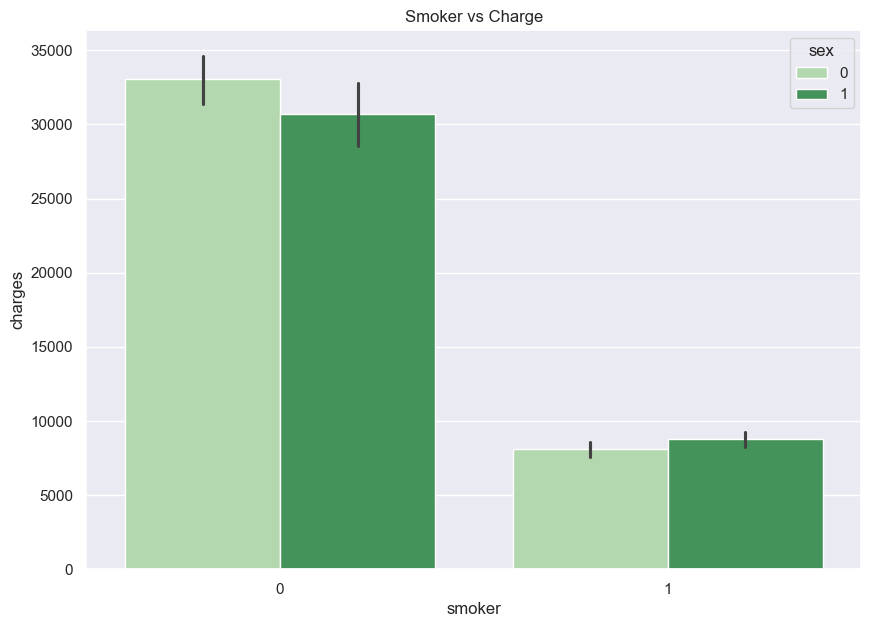

In [375]:
#Plotting Smoker vs Charge Bar Plot
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=insurance_dataset,palette='Greens',hue='sex')

As shown in this graph, being a Smoker shows a higher chance of having greater Medical Insurance Cost, making it a very relevant feature


In [378]:
#SPLITTING THE FEATURES AND TARGET

In [380]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [382]:
#Check X
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [384]:
#Check Y
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [386]:
#Splitting the data into Training dat and Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [388]:
#check how many rows are split into train and test 
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING - LINEAR REGRESSION


In [391]:
#loading the linear regression model
reg = LinearRegression()


In [ ]:
reg.fit(X_train, Y_train) #this will plot the line and fit the regressor

LinearRegression()

Model Evaluation

In [396]:
#prediction of training data
training_data_prediction = reg.predict(X_train)

In [398]:
#Performance metric - R Squared Value

#comparing original values of y train and the values predicted by the model
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared value: ", r2_train)

R Squared value:  0.751505643411174


In [400]:
#prediction of testing data
test_data_prediction = reg.predict(X_test)

In [402]:
#Performance metric - R Squared Value

#comparing original values of y train and the values predicted by the model
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared value: ", r2_test)

R Squared value:  0.7447273869684077


The values are almostn equal to each other so there is no issue of overfitting

BUILDING A PREDICTIVE SYSTEM


In [408]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
input_data = (31,1,25.74,0,1,0)

input_data_df = pd.DataFrame([input_data], columns=feature_names)



In [348]:
input_data_df

,age,sex,bmi,children,smoker,region
0,31,1,25.74,0,1,0


In [412]:
# Predict using the model
prediction = reg.predict(input_data_df)

# Output the prediction
print('The insurance cost is USD', prediction[0])

#compare this value to actual value (3756.62)

The insurance cost is USD 3760.0805764960423


In [352]:
# Printing Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 38337035.48643883
Root Mean Squared Error (RMSE): 6191.690842285234
